In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

making the signal u(n)= -au(n- 1)+ v(n)

In [2]:
a=0.99
d_prev=1
N=10000
u_val=1
in_sig=list()
d_sig=list()
noise=np.random.normal(0,0.3,N)
for i in range(0,N):
    in_sig.append(u_val+noise[i])
    d_sig.append(u_val)
    u_val=in_sig[-1]*-a

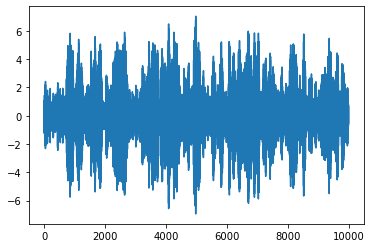

In [3]:
plt.plot(in_sig)

Input Signal

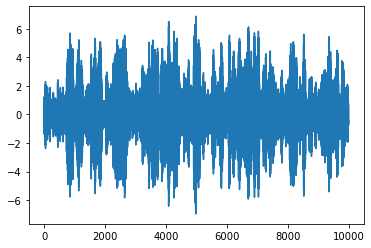

In [5]:
plt.plot(d_sig)

Desired Signal

In [6]:
def filter_lmsM1(in_sig,d_sig,mu):
    weights=list([0])
    out=list()
    mse=list()
    pred_error=list()
    cm=0
    for i in range(0,len(d_sig)):
        out.append(weights[-1]*in_sig[i])
        weights.append((weights[-1])+(d_sig[i]-(weights[-1]*in_sig[i]))*mu*in_sig[i])
        pred_error.append((d_sig[i]-weights[-1]*in_sig[i])**2)
        cm+=(d_sig[i]-weights[-1]*in_sig[i])**2
        mse.append(cm/(i+1))
    return out, weights, pred_error, mse

Function to compute output, weights, prediction error and mean square error at length M=1 

In [10]:
mus=[0.3,0.01,0.005,0.001]
wts_list=list()
pred_err_list=list()
outs_list=list()
mse_list=list()
for i in mus:
    o,w,p,m=filter_lmsM1(in_sig,d_sig,i)
    wts_list.append(w)
    pred_err_list.append(p)
    outs_list.append(o)
    mse_list.append(m)

<ipython-input-6-651cffda2801>:10: RuntimeWarning: overflow encountered in double_scalars
  pred_error.append((d_sig[i]-weights[-1]*in_sig[i])**2)
<ipython-input-6-651cffda2801>:11: RuntimeWarning: overflow encountered in double_scalars
  cm+=(d_sig[i]-weights[-1]*in_sig[i])**2


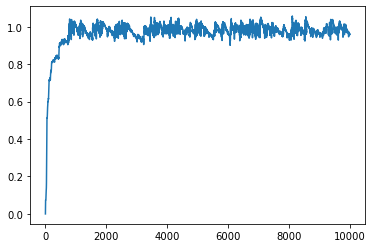

In [11]:
plt.plot(wts_list[1])

Text(0, 0.5, 'w_hat')

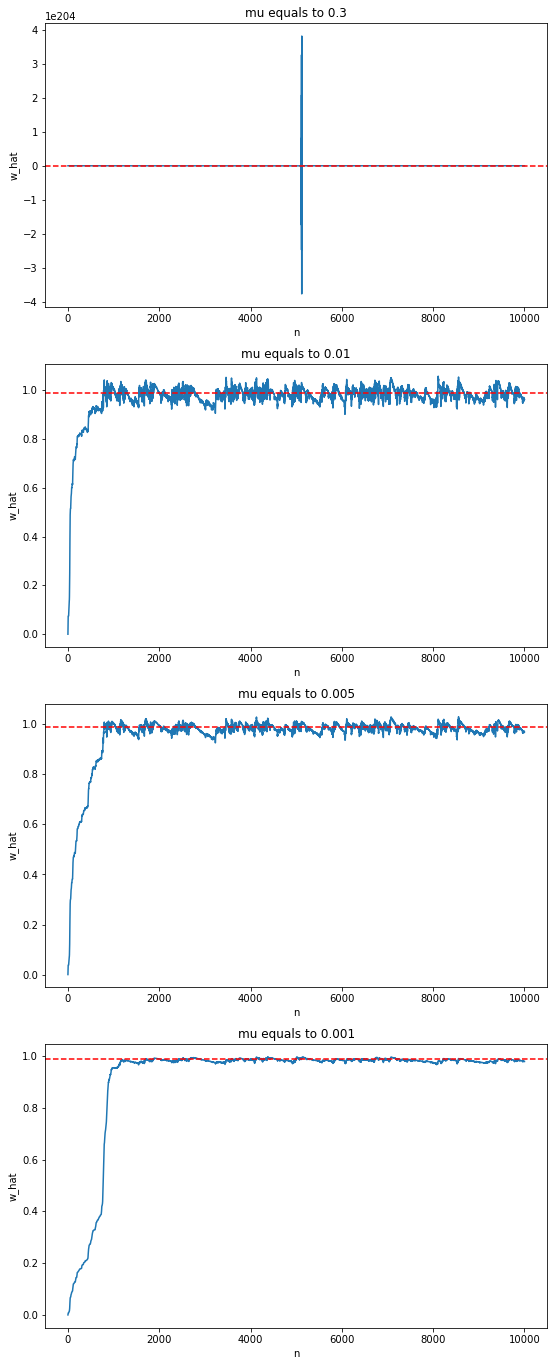

In [12]:
plt.figure(figsize=(9,24))
plt.subplot(4,1,1)
plt.plot(wts_list[0],'-')
plt.axhline(y=0.99, color='r', linestyle='--')
plt.title('mu equals to '+str(mus[0]))
plt.xlabel('n')
plt.ylabel('w_hat')
plt.subplot(4,1,2)
plt.plot(wts_list[1],'-')
plt.axhline(y=0.99, color='r', linestyle='--')
plt.title('mu equals to '+str(mus[1]))
plt.xlabel('n')
plt.ylabel('w_hat')
plt.subplot(4,1,3)
plt.plot(wts_list[2],'-')
plt.axhline(y=0.99, color='r', linestyle='--')
plt.title('mu equals to '+str(mus[2]))
plt.xlabel('n')
plt.ylabel('w_hat')
plt.subplot(4,1,4)
plt.plot(wts_list[3],'-')
plt.axhline(y=0.99, color='r', linestyle='--')
plt.title('mu equals to '+str(mus[3]))
plt.xlabel('n')
plt.ylabel('w_hat')


Text(0.5, 0, 'Number of adaptation cycles, n')

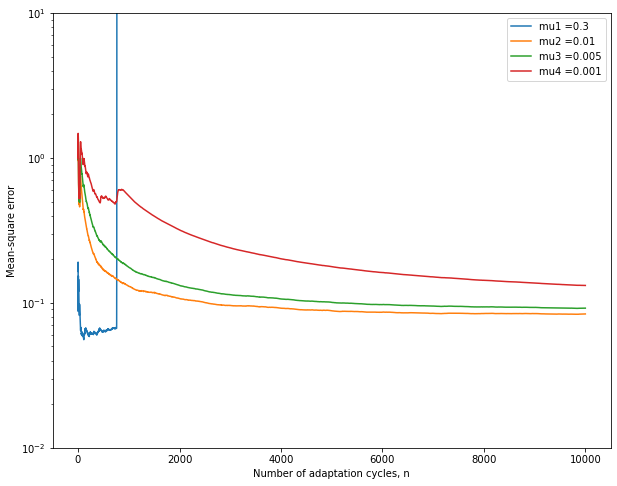

In [13]:
plt.figure(figsize=(10,8))
plt.plot(mse_list[0],label='mu1 ='+str(mus[0]))
plt.plot(mse_list[1],label='mu2 ='+str(mus[1]))
plt.plot(mse_list[2],label='mu3 ='+str(mus[2]))
plt.plot(mse_list[3],label='mu4 ='+str(mus[3]))
plt.legend()
plt.ylim(0.01,10)
plt.yscale('log')
plt.ylabel('Mean-square error')
plt.xlabel('Number of adaptation cycles, n')


Question 2 Problem 17 chapter 6

In [14]:
cov_u = 1 # unit variance
a_1 = 0.1 # init a1
a_2 = -0.8 # init a2
N = 50000 # signal length

In [15]:
# according to <Adaptive filter theory 5th edition> chapter 1.9
r_0 = cov_u
r_1 = cov_u * -a_1/(1 + a_2)
r_2 = cov_u * (-a_2 + a_1**2/(1 + a_2))
cov_v = r_0 + a_1*r_1 + a_2*r_2
# making the white noise using computed variance(cov_v)
# white noise
mean = 0
std = np.sqrt(cov_v)
white_noise = np.random.normal(mean, std, size = N)
print('noise variance is',cov_v)

noise variance is 0.2699999999999998


In [19]:
u_ls=[3.02377431, -1.56652768]
d_ls=[]
for i in range(0,N):
    u_ls.append(-a_1*u_ls[-1]-a_2*u_ls[-2]+white_noise[i])
    d_ls.append(-a_1*u_ls[-1]-a_2*u_ls[-2])
UN=np.array(u_ls[3:])
DN=np.array(d_ls[2:])

print("variance of U(n)=", np.var(UN) )

variance of U(n)= 1.0051141970123347


Creation of noisy signal and desired signal

In [20]:
def lms_filter(UN,DN,M,mu):
    w0=np.matrix(np.zeros(M)).T
    wts=list()
    wts2=list()
    out=list()
    pred_error=list()
    ms_err=list()
    wt_err1=list()
    wt_err2=list()
    err_cm=0
    for i in range(M,len(UN)):
        un=np.matrix(UN[i-M:i]).T
        dn=np.matrix(DN[i-M])
        e=dn-w0.T*un
        en=np.array(e)[0][0]
        out.append(np.array(w0.T*un)[0][0])
        #wts1.append(np.array(w0)[0][0])
        #wts2.append(np.array(w0)[1][0])
        wts.append(np.sum(w0[0][0]))
        pred_error.append(np.array(un[0]-w0.T*un)[0][0])
        err_cm+=np.array((dn[0]-w0.T*un)**2)[0][0]
        ms_err.append(err_cm/i)    
        wt_err1.append(-a_1-np.array(w0)[1][0])
        wt_err2.append(-a_2-np.array(w0)[0][0])
        w0=w0+mu*en*un
    return out,wts,pred_error,ms_err,wt_err1,wt_err2

Function with variable length for M, we keep it M=2 for our problem

In [21]:
mus=[0.005,0.3,0.01,0.001]
wts_list=list()
pred_err_list=list()
outs_list=list()
mse_list=list()
for i in mus:
    v1,v2,v3,v4,v5,v6=lms_filter(UN,DN,2,i)
    wts_list.append(v2)
    pred_err_list.append(v3)
    outs_list.append(v1)
    mse_list.append(v4)

Simulation the filter for various values of mu

Text(0, 0.5, 'w_hat')

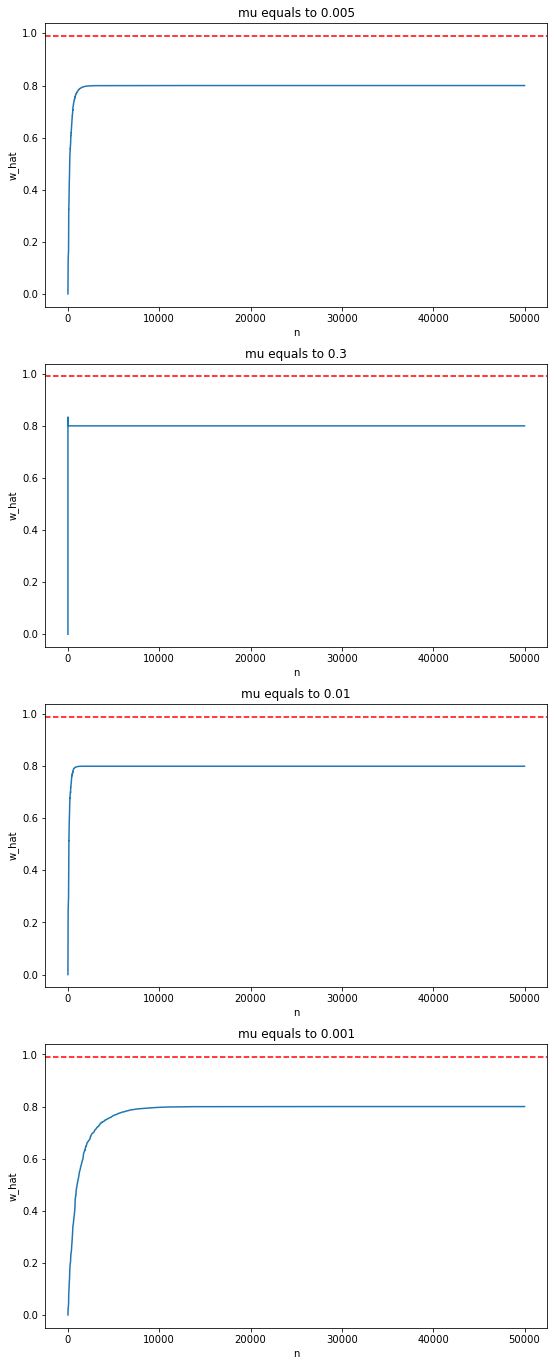

In [22]:
plt.figure(figsize=(9,24))
plt.subplot(4,1,1)
plt.plot(wts_list[0],'-')
plt.axhline(y=0.99, color='r', linestyle='--')
plt.title('mu equals to '+str(mus[0]))
plt.xlabel('n')
plt.ylabel('w_hat')
plt.subplot(4,1,2)
plt.plot(wts_list[1],'-')
plt.axhline(y=0.99, color='r', linestyle='--')
plt.title('mu equals to '+str(mus[1]))
plt.xlabel('n')
plt.ylabel('w_hat')
plt.subplot(4,1,3)
plt.plot(wts_list[2],'-')
plt.axhline(y=0.99, color='r', linestyle='--')
plt.title('mu equals to '+str(mus[2]))
plt.xlabel('n')
plt.ylabel('w_hat')
plt.subplot(4,1,4)
plt.plot(wts_list[3],'-')
plt.axhline(y=0.99, color='r', linestyle='--')
plt.title('mu equals to '+str(mus[3]))
plt.xlabel('n')
plt.ylabel('w_hat')

Text(0.5, 0, 'Number of adaptation cycles, n')

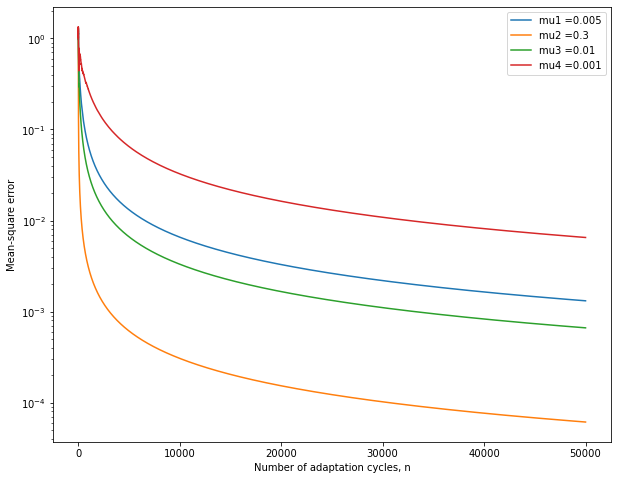

In [24]:
plt.figure(figsize=(10,8))
plt.plot(mse_list[0],label='mu1 ='+str(mus[0]))
plt.plot(mse_list[1],label='mu2 ='+str(mus[1]))
plt.plot(mse_list[2],label='mu3 ='+str(mus[2]))
plt.plot(mse_list[3],label='mu4 ='+str(mus[3]))
plt.legend()
plt.yscale('log')
plt.ylabel('Mean-square error')
plt.xlabel('Number of adaptation cycles, n')

In [25]:
M=2
mu=0.005
w0=np.matrix(np.zeros(M)).T
wts1=list()
wts2=list()
out=list()
pred_error=list()
ms_err=list()
wt_err1=list()
wt_err2=list()
err_cm=0
for i in range(M,len(UN)):
    un=np.matrix(UN[i-M:i]).T
    dn=np.matrix(DN[i-M])
    e=dn-w0.T*un
    en=np.array(e)[0][0]
    out.append(np.array(w0.T*un)[0][0])
    wts1.append(np.array(w0)[0][0])
    wts2.append(np.array(w0)[1][0])
    pred_error.append(np.array(un[0]-w0.T*un)[0][0])
    err_cm+=np.array((dn[0]-w0.T*un)**2)[0][0]
    ms_err.append(err_cm/i)    
    wt_err1.append(-a_1-np.array(w0)[1][0])
    wt_err2.append(-a_2-np.array(w0)[0][0])
    w0=w0+mu*en*un

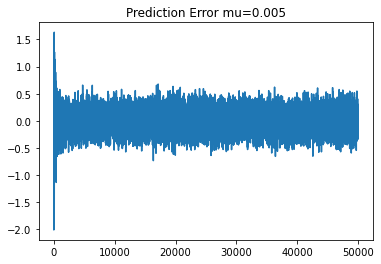

In [26]:
plt.title('Prediction Error mu=0.005')
plt.plot(pred_error)


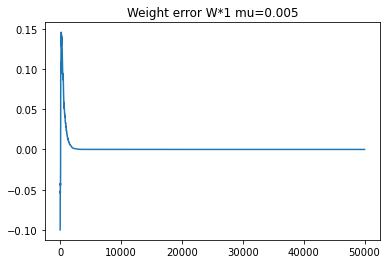

In [27]:
plt.title('Weight error W*1 mu=0.005')
plt.plot(wt_err1)

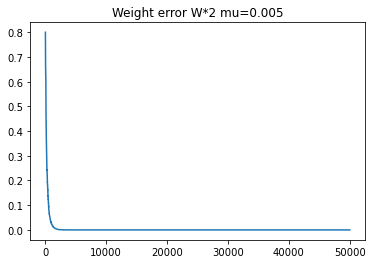

In [28]:
plt.title('Weight error W*2 mu=0.005')
plt.plot(wt_err2)

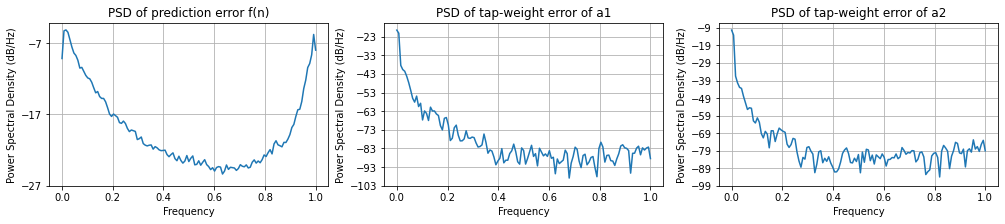

In [29]:
plt.figure(figsize=(17,3))
plt.subplot(1,3,1)
plt.psd(pred_error)
plt.title('PSD of prediction error f(n)')
plt.subplot(1,3,2)
plt.psd(wt_err1)
plt.title('PSD of tap-weight error of a1')
plt.subplot(1,3,3)
plt.psd(wt_err2)
plt.title('PSD of tap-weight error of a2')
plt.show()

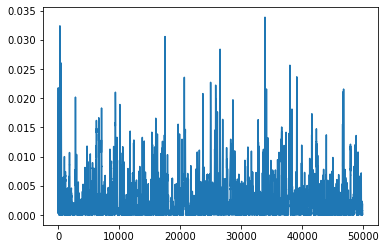

In [30]:
en_av=list()
for i in range(100,len(pred_error)):
    en_av.append((np.mean(pred_error[i-100:i]))**2)
plt.plot(en_av)

Ensemble Average of prediction error

In [31]:
no_of_runs=100
pred_list=list()
for j in range(0,no_of_runs):
    cov_u = 1 # unit variance
    a_1 = 0.1 # init a1
    a_2 = -0.8 # init a2
    N = 50000
    mean = 0
    std = np.sqrt(cov_v)
    white_noise = np.random.normal(mean, std, size = N)
    u_ls=[3.02377431, -1.56652768]
    d_ls=[]
    for i in range(0,N):
        u_ls.append(-a_1*u_ls[-1]-a_2*u_ls[-2]+white_noise[i])
        d_ls.append(-a_1*u_ls[-1]-a_2*u_ls[-2])
    UN=np.array(u_ls[3:])
    DN=np.array(d_ls[2:])
    M=2
    mu=0.005
    w0=np.matrix(np.zeros(M)).T
    wts1=list()
    wts2=list()
    out=list()
    pred_error=list()
    ms_err=list()
    wt_err1=list()
    wt_err2=list()
    err_cm=0
    for i in range(M,len(UN)):
        un=np.matrix(UN[i-M:i]).T
        dn=np.matrix(DN[i-M])
        e=dn-w0.T*un
        en=np.array(e)[0][0]
        out.append(np.array(w0.T*un)[0][0])
        wts1.append(np.array(w0)[0][0])
        wts2.append(np.array(w0)[1][0])
        pred_error.append(np.array(un[0]-w0.T*un)[0][0])
        err_cm=np.array((dn[0]-w0.T*un)**2)[0][0]
        ms_err.append(err_cm)    
        wt_err1.append(-a_1-np.array(w0)[1][0])
        wt_err2.append(-a_2-np.array(w0)[0][0])
        w0=w0+mu*en*un        
    pred_list.append(ms_err)
    

100 simulations over different realisation of the signal at mu=0.005

In [32]:
squared_errors = np.sum(pred_list,axis=0)
mean_squared_errors = squared_errors/no_of_runs

Text(0.5, 0, 'Number of adaptation cycles')

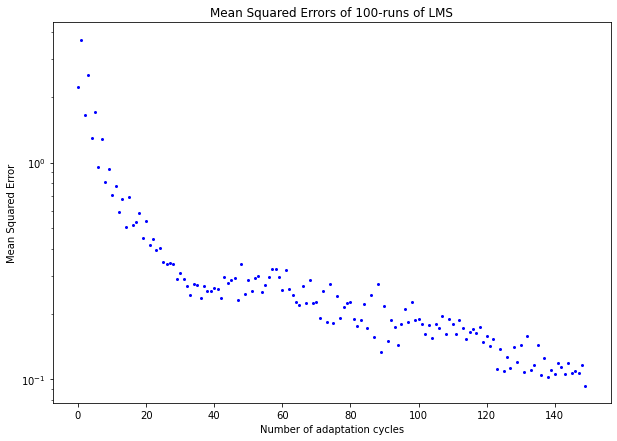

In [34]:
plt.figure(figsize=(10,7))
plt.plot(mean_squared_errors[0:150],'bo',ms=2)
plt.yscale('log')

plt.title('Mean Squared Errors of 100-runs of LMS')
plt.ylabel('Mean Squared Error')
plt.xlabel('Number of adaptation cycles')